# 事前準備：共通コードの実行
* このノートブックに接続したら，まずは以下の2つの共通コード（コードAとコードB）を実行する
* これらの共通コードを実行しないと，それ以降のコードが実行できないので注意する
* また，コードAとコードBは，ノートブックに接続するたび毎回実行すること（ノートブックに接続中は，何度も実行する必要はない）
* 共通コードの詳細についての説明は割愛する（簡単な説明は第2回の「[サンプルノートブック02](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook02.ipynb)」を参照）

In [ ]:
# コードA：日本語化ライブラリ導入
! pip install japanize-matplotlib | tail -n 1

In [3]:
# コードB：共通事前処理

# B1:余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib # matplotlib日本語化対応
import seaborn as sns

# B2:データフレーム表示用関数
from IPython.display import display

# B3:表示オプション調整
np.set_printoptions(suppress = True, precision = 3) #numpyの浮動小数点の表示精度
pd.options.display.float_format = '{:.3f}'.format #pandasでの浮動小数点の表示精度
pd.set_option('display.max_columns', None) #データフレームですべての列データを表示

# B4:グラフのデフォルトフォント指定
plt.rcParams['font.size'] = 14

# 乱数の種
random_seed = 0

# 顧客データの前処理
* 今回の分析で用いる顧客データの前処理を行う

## 用いるデータと分析の目的
* 前回（第10回）も使用した，以下のURLにある顧客データ（csvファイル）を用いる
>* https://tinyurl.com/2539almp
>* 出典: 須藤秋良, 株式会社フレアリンク: スッキリわかるPythonによる機械学習入門, インプレス, 2020
* ここで利用するデータは出典（教科書）のデータを加工している
* オリジナルのデータは，「Wholedf customers Data Set (卸売業者の顧客データ)」と呼ばれているデータセットで，ポルトガルの卸売業者の顧客データで，商品カテゴリ毎に顧客単位の年間支出額が入っている
>* オリジナルのデータのURL: https://archive.ics.uci.edu/ml/datasets/Wholedf+customers
* 今回は，k-means法と主成分分析を使って，顧客データの傾向を分析することを考える
* 各列名と意味は以下の通り
  
|**列名**| **意味** |
|:--|:--|
|生鮮食品| 生鮮食品の年間支出額 |
|乳製品| 乳製品の年間支出額 |
|食料雑貨品| 食料雑貨品の年間支出額 |
|冷凍食品| 冷凍食品の年間支出額 |
|洗剤・紙製品| 洗剤と紙製品の年間支出額 |
|惣菜| 惣菜の年間支出額 |
  
**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `display`関数を使ってデータ（`df`の内容）を表示


In [5]:
url = 'https://tinyurl.com/2539almp'
df = pd.read_csv(url)
display(df)

,生鮮食品,乳製品,食料雑貨品,冷凍食品,洗剤・紙製品,惣菜
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


## データの標準化
* 顧客データに欠損値がないことは前回確認済みなので，データの標準化から行う
  
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `preprocessing`モジュールの`StandardScaler`クラスの読み込み
* 4行目: `StandardScaler`クラスのオブジェクトを生成し，変数`sc`に代入
* 5行目: `sc`に対し，`fit`メソッドを適用する（引数は`df`）
* 6行目: `sc`に対する`transform`メソッドで`df`を標準化し，その結果を変数`df_s`に代入
* 7行目: `DataFrame`関数で，`df_s`をDataFrameに変換し，その結果を変数`df_cluster`に代入
>* `columns = df.columns`で，変換したDataFrameの列名を「生鮮食品」～「惣菜」に指定
* 8行目: `display`関数を使ってデータ（`df_cluster`の内容）を表示

In [6]:
url = 'https://tinyurl.com/2539almp'
df = pd.read_csv(url)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df_cluster = pd.DataFrame(df_s, columns = df.columns)
display(df_cluster)

,生鮮食品,乳製品,食料雑貨品,冷凍食品,洗剤・紙製品,惣菜
0,0.053,0.524,-0.041,-0.589,-0.044,-0.066
1,-0.391,0.544,0.170,-0.270,0.086,0.089
2,-0.447,0.409,-0.028,-0.138,0.133,2.243
3,0.100,-0.624,-0.393,0.687,-0.499,0.093
4,0.840,-0.052,-0.079,0.174,-0.232,1.299
...,...,...,...,...,...,...
435,1.401,0.848,0.851,2.075,-0.567,0.241
436,2.155,-0.592,-0.757,0.297,-0.586,0.292
437,0.200,1.315,2.348,-0.543,2.511,0.121
438,-0.135,-0.518,-0.603,-0.419,-0.570,0.213


# 顧客データのクラスタリング
* まずは，k-means法を用いて，標準化した顧客データのクラスタリングを行う
* 処理手順は，第10回「[サンプルノートブック10](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook10.ipynb)」と同様

## モデルの学習
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3～7行目: データの標準化を行い，標準化したデータを変数`df_cluster`に代入
* 8行目:  `sklearn` (scikit-learn) の`cluster`モジュール内にある`KMeans`クラスを読み込む 
* 9行目: `KMeans(n_clusters = 3, random_state = random_seed)`で，モデルの学習を行うためのオブジェクトを`KMeans`クラスから生成し，変数`kmeans_model`に代入
>* `n_clusters = 3`で，クラスタ数を 3 に設定
>* `random_state = random_seed`で，乱数を固定
* 10行目: `fit`メソッドでモデルの学習（データ`df_cluster`のクラスタリング）を実行
* 11行目: クラスタリングした結果の列データ（`kmeans_model.labels_`）を`df_cluster`に追加
>* 列名を「cluster」とした
* 12行目: `display`関数を使ってデータ（`df`の内容）を表示

In [7]:
url = 'https://tinyurl.com/2539almp'
df = pd.read_csv(url)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df_cluster = pd.DataFrame(df_s, columns = df.columns)
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3, random_state = random_seed)
kmeans_model.fit(df_cluster)
df_cluster['cluster'] = kmeans_model.labels_
display(df_cluster)

,生鮮食品,乳製品,食料雑貨品,冷凍食品,洗剤・紙製品,惣菜,cluster
0,0.053,0.524,-0.041,-0.589,-0.044,-0.066,2
1,-0.391,0.544,0.170,-0.270,0.086,0.089,2
2,-0.447,0.409,-0.028,-0.138,0.133,2.243,2
3,0.100,-0.624,-0.393,0.687,-0.499,0.093,2
4,0.840,-0.052,-0.079,0.174,-0.232,1.299,0
...,...,...,...,...,...,...,...
435,1.401,0.848,0.851,2.075,-0.567,0.241,0
436,2.155,-0.592,-0.757,0.297,-0.586,0.292,0
437,0.200,1.315,2.348,-0.543,2.511,0.121,1
438,-0.135,-0.518,-0.603,-0.419,-0.570,0.213,2


## クラスタの分析

### 各クラスタのデータ数
* 前回と同様にして，各クラスタに属するデータ数を確認する
  
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3～7行目: データの標準化を行い，標準化したデータを変数`df_cluster`に代入
* 8～11行目: データのクラスタリングを行い，その結果を`df_cluster`に代入
* 12行目: クラスタリングの結果が格納されている cluster列の値の頻度を抽出し，その結果を`display`関数で表示

In [8]:
url = 'https://tinyurl.com/2539almp'
df = pd.read_csv(url)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df_cluster = pd.DataFrame(df_s, columns = df.columns)
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3, random_state = random_seed)
kmeans_model.fit(df_cluster)
df_cluster['cluster'] = kmeans_model.labels_
display(pd.DataFrame(df_cluster['cluster'].value_counts()))

,count
cluster,
2,322
0,72
1,46


### 特徴量の散布図行列を作成
* seaborn（`sns`）モジュールの`pairplot`関数を用いて，特徴量に対する散布図行列を作成し，特徴量間の相関を確認する
* 以下のコードの実行結果から，食料雑貨品と洗剤・紙製品に強い正の相関があることが確認できる
* また，乳製品と食料雑貨品にも正の相関がありそうにみえる
  
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3～7行目: データの標準化を行い，標準化したデータを変数`df_cluster`に代入
* 8～11行目: データのクラスタリングを行い，その結果を`df_cluster`に代入
* 12行目: `pairplot`関数を使って散布図行列を作成
>* `drop`メソッドで cluster列を取り除いたものを `pairplot`関数の引数とする
>* `axis = 1` は列を取り除くという意味（`axis = 0`は行）
>* DataFrame `df_cluster`から cluster列が削除されているわけではない（元のDataFrame `df_cluster` は変化しない）
* 13行目: `show`関数で，それまでに設定した図（散布図行列）を実行画面に表示

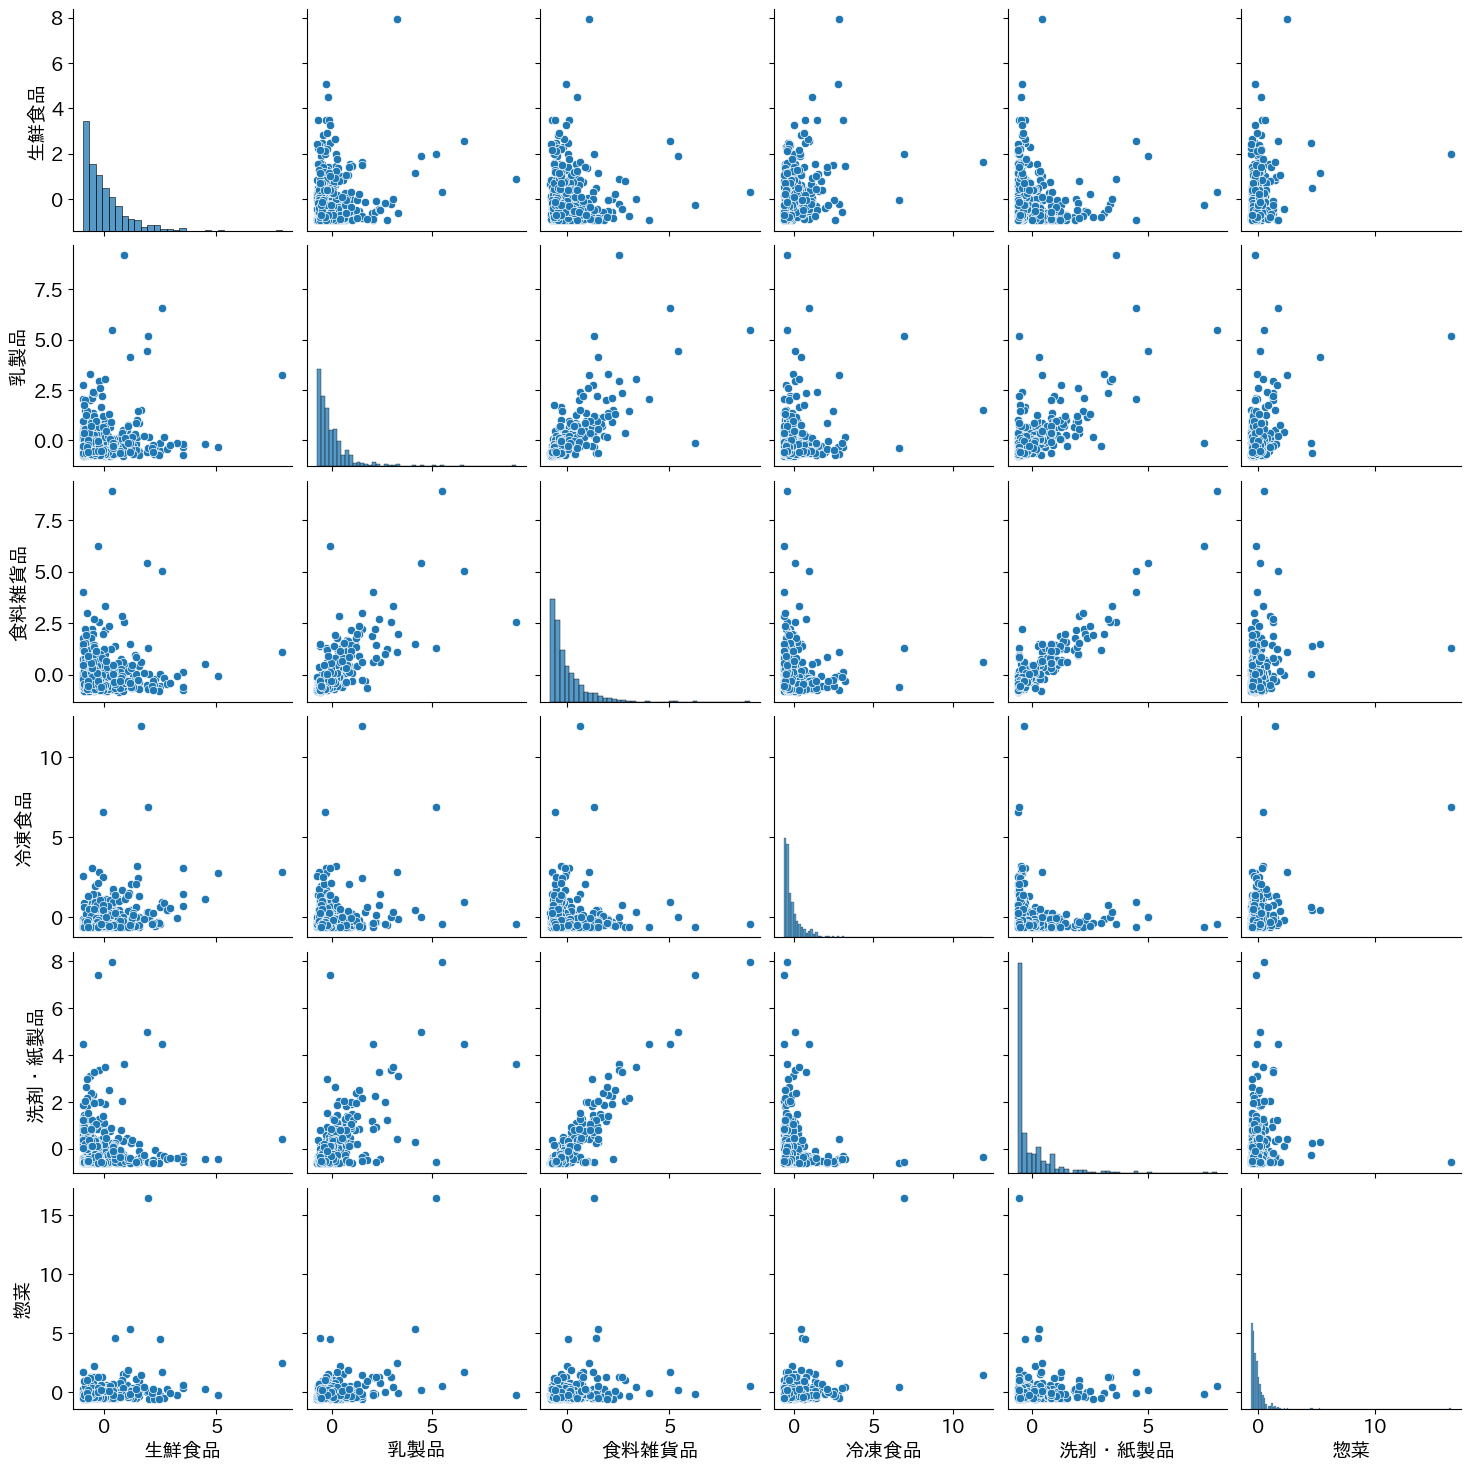

In [9]:
url = 'https://tinyurl.com/2539almp'
df = pd.read_csv(url)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df_cluster = pd.DataFrame(df_s, columns = df.columns)
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3, random_state = random_seed)
kmeans_model.fit(df_cluster)
df_cluster['cluster'] = kmeans_model.labels_
sns.pairplot(df_cluster.drop('cluster', axis = 1))
plt.show()

### 特徴量の相関係数行列を作成
* 次に各特徴量間の相関係数を確認する
* 以下のコードでは，`corr`メソッドを使って，DataFrame `df_cluster`の cluster列を除いた列データ（特徴量）のすべての組み合わせに対する相関係数（相関係数行列）を計算している
* 実行結果から，食料雑貨品と洗剤・紙製品の相関係数が 0.925，乳製品と食料雑貨品の相関係数が 0.728 であることが確認できる
  
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3～7行目: データの標準化を行い，標準化したデータを変数`df_cluster`に代入
* 8～11行目: データのクラスタリングを行い，その結果を`df_cluster`に代入
* 12行目: `pairplot`関数を使って散布図行列を作成
* 13行目: cluster列を除いた `df_cluster` に対する相関係数行列を計算し，その結果を変数`r`に代入
>* まず，`drop`メソッドを使って，`df_cluster.drop('cluster', axis = 1)`とし，`df_cluster`からcluster列を除く
>* その結果（戻り値）に対し，`corr`メソッドで相関係数行列を計算
* 相関係数行列 `r` を `display`関数で表示

In [13]:
url = 'https://tinyurl.com/2539almp'
df = pd.read_csv(url)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df_cluster = pd.DataFrame(df_s, columns = df.columns)
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3, random_state = random_seed)
kmeans_model.fit(df_cluster)
df_cluster['cluster'] = kmeans_model.labels_
r = df_cluster.drop('cluster', axis = 1).corr()
display(r)

,生鮮食品,乳製品,食料雑貨品,冷凍食品,洗剤・紙製品,惣菜
生鮮食品,1.000,0.101,-0.012,0.346,-0.102,0.245
乳製品,0.101,1.000,0.728,0.124,0.662,0.406
食料雑貨品,-0.012,0.728,1.000,-0.040,0.925,0.205
冷凍食品,0.346,0.124,-0.040,1.000,-0.132,0.391
洗剤・紙製品,-0.102,0.662,0.925,-0.132,1.000,0.069
惣菜,0.245,0.406,0.205,0.391,0.069,1.000


### 散布図とクラスタ
* 次に，食料雑貨品と洗剤・紙製品，及び乳製品と食料雑貨品の散布図上で各クラスタのデータがきれいに分かれているかを確認する
* そのために，前回（第10回）と同様に`lmplot`関数を使って，クラスタごとにマーカーを色分けした散布図を作成する
* `lmplot`関数については，第10回「[サンプルノートブック10](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook10.ipynb)」を参照
* 以下のコードでは，クラスタごとにマーカーを色分けした2つの散布図を作成している
>* 1つ目が食料雑貨品と洗剤・紙製品の散布図
>* 2つ目が乳製品と食料雑貨品の散布図
* 実行結果から散布図上で各クラスタのデータがきれいに分かれているとは言えないことがわかる
* 特にクラスタ0は，他の2つのクラスタ内に混在しているように見える
  
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3～7行目: データの標準化を行い，標準化したデータを変数`df_cluster`に代入
* 8～11行目: データのクラスタリングを行い，その結果を`df_cluster`に代入
* 12行目: `lmplot`関数を使って，クラスタごとに色分けした食料雑貨品と洗剤・紙製品の散布図を作成
* 13行目: `show`関数で，それまでに設定した図（食料雑貨品と洗剤・紙製品の散布図）を実行画面に表示
* 14行目: `lmplot`関数を使って，種類ごとに色分けした乳製品と食料雑貨品の散布図を作成
>* 1つ目の散布図に合わせて，x軸を食料雑貨品にした
* 15行目: `show`関数で，それまでに設定した図（乳製品と食料雑貨品の散布図）を実行画面に表示

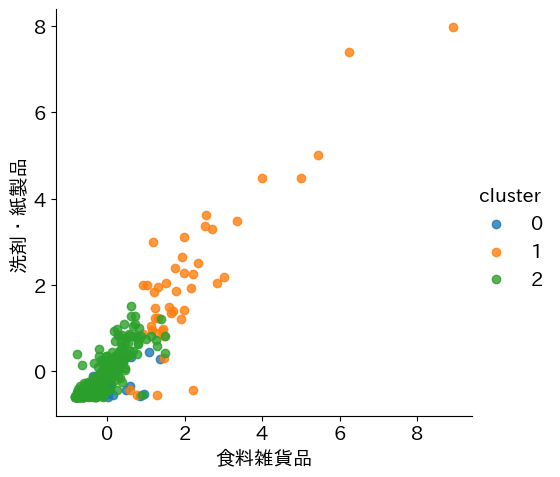

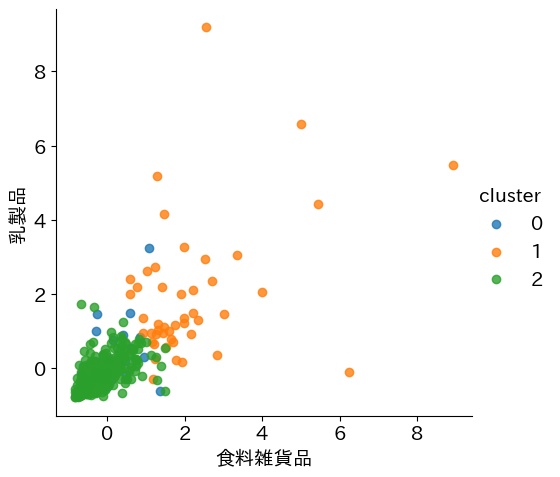

In [16]:
url = 'https://tinyurl.com/2539almp'
df = pd.read_csv(url)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df_cluster = pd.DataFrame(df_s, columns = df.columns)
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3, random_state = random_seed)
kmeans_model.fit(df_cluster)
df_cluster['cluster'] = kmeans_model.labels_
sns.lmplot(data = df_cluster, x = '食料雑貨品', y = '洗剤・紙製品', hue = 'cluster', fit_reg = False)
plt.show()
sns.lmplot(data = df_cluster, x = '食料雑貨品', y = '乳製品', hue = 'cluster', fit_reg = False)
plt.show()

# 顧客データの次元削減
* 2つの特徴量の散布図からでは，データをきれいに分割することができなかった
* 他の特徴量も考慮に入れることで，データをきれいに分割できるかもしれないが，散布図（2次元の図）で可視化することができない
* この問題を解決するために，主成分分析による次元削減を行う
* 次元削減によって複数の特徴量の情報を集約した2つの変数（軸）が作成できるので，その2つの変数を使って散布図を描いてみる

## モデルの学習
* 主成分分析による次元削減は，`sklearn`（scikit-learn）の`decomposition`モジュールにおける`PCA`クラスを使う
* 主成分分析による次元削減の流れ:
>* `PCA`クラスを読み込む（インポートする）
>* インポートの書式: `from sklearn.decomposition import PCA`
>* `PCA`クラスのオブジェクトを生成し，変数に代入する
>* オブジェクト生成の書式: `変数 = PCA(n_components = [新しい軸の数])`
>* モデルを学習する（主成分分析を行う）
>* モデルの学習の書式: `変数.fit_transform(データ)` ※ `fit`ではなく`fit_transform`であることに注意する
* `fit_transform`メソッドで，生成する新しい軸（固有ベクトル），及びその軸における各データの値（データを軸に射影した値）を計算する
>* `fit_transform`メソッドには戻り値がある
>* 戻り値のクラス（データ型）は配列（NumPyのndarray） 
>* 配列の要素: 各固有ベクトルにおける各データの値 
* 以下のコードでは，クラスタリングを行った後，続けて主成分分析を行い，6次元データを2次元データに次元削減している
  
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3～7行目: データの標準化を行い，標準化したデータを変数`df_cluster`に代入
* 8～11行目: データのクラスタリングを行い，その結果を`df_cluster`に代入
* 12行目:  `sklearn` (scikit-learn) の`decomposition`モジュール内にある`PCA`クラスを読み込む 
* 13行目: `PCA(n_components = 2)`で，モデルの学習を行うためのオブジェクトを`PCA`クラスから生成し，変数`pca_model`に代入
>* `n_components = 2`で，生成する新しい軸（固有ベクトル）の数を 2 に設定
* 14行目: `fit_transform`メソッドでモデルの学習（主成分分析）を実行
>* `drop`メソッドで，`df_cluster`から特徴量ではない cluster列を除いたものを`fit_transform`メソッドの引数として渡している
>* 戻り値である各固有ベクトルにおける各データの値を変数`component`に代入
* 15行目: `DataFrame`関数を使って，`component` をDataFrameに変換し，その結果を変数`df_pca`に代入
>* DataFrameは固有ベクトルの数と同じ2列
>* 列名はそれぞれ「第1固有ベクトル」「第2固有ベクトル」とする
* 16行目: `concat`関数を使って，`df_cluster`と`df_pca`を結合し，その結果を変数`df_all`に代入
* 17行目: `display`関数を使ってデータ（`df_all`の内容）を表示

In [23]:
url = 'https://tinyurl.com/2539almp'
df = pd.read_csv(url)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df_cluster = pd.DataFrame(df_s, columns = df.columns)
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3, random_state = random_seed)
kmeans_model.fit(df_cluster)
df_cluster['cluster'] = kmeans_model.labels_
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)
component = pca_model.fit_transform(df_cluster.drop('cluster', axis = 1))
df_pca = pd.DataFrame(component, columns = ['第1固有ベクトル', '第2固有ベクトル'])
df_all = pd.concat([df_cluster, df_pca], axis = 1)
display(df_all)

,生鮮食品,乳製品,食料雑貨品,冷凍食品,洗剤・紙製品,惣菜,cluster,第1固有ベクトル,第2固有ベクトル
0,0.053,0.524,-0.041,-0.589,-0.044,-0.066,2,0.193,-0.305
1,-0.391,0.544,0.170,-0.270,0.086,0.089,2,0.434,-0.328
2,-0.447,0.409,-0.028,-0.138,0.133,2.243,2,0.811,0.815
3,0.100,-0.624,-0.393,0.687,-0.499,0.093,2,-0.779,0.653
4,0.840,-0.052,-0.079,0.174,-0.232,1.299,0,0.166,1.271
...,...,...,...,...,...,...,...,...,...
435,1.401,0.848,0.851,2.075,-0.567,0.241,0,0.871,2.221
436,2.155,-0.592,-0.757,0.297,-0.586,0.292,0,-0.903,1.677
437,0.200,1.315,2.348,-0.543,2.511,0.121,1,3.466,-1.040
438,-0.135,-0.518,-0.603,-0.419,-0.570,0.213,2,-0.918,-0.030


## 結果の分析

### 主成分負荷量の確認
* 元データと新データの特徴量の関係を把握したいときに使う量
* 元データの特徴量と新データの特徴量との相関係数 ⇒ `corr`メソッドで計算できる
  
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3～7行目: データの標準化を行い，標準化したデータを変数`df_cluster`に代入
* 8～11行目: データのクラスタリングを行い，その結果を`df_cluster`に代入
* 12～16行目: 主成分分析（新しい軸の数は 2）を行い，クラスタリングと主成分分析を併せた結果を変数`df_all`に代入
* 17行目: `corr`メソッドを使って主成分負荷量（元データの特徴量と新データの特徴量との相関係数）を計算し，その結果を変数`r`に代入
>* 必要のない組み合わせ（cluster列に関する相関係数）も計算しているが，分析に影響は出ないので，ここでは気にしないことにする
* 18行目: `r`から主成分負荷量の部分を抽出し，`display`関数で表示
>* `r['生鮮食品':'惣菜'][['第1固有ベクトル', '第2固有ベクトル']]`で，DataFrame `r`から生鮮食品～惣菜の行，第1固有ベクトルと第2固有ベクトルの列を抽出

In [14]:
url = 'https://tinyurl.com/2539almp'
df = pd.read_csv(url)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df_cluster = pd.DataFrame(df_s, columns = df.columns)
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3, random_state = random_seed)
kmeans_model.fit(df_cluster)
df_cluster['cluster'] = kmeans_model.labels_
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)
component = pca_model.fit_transform(df_cluster.drop('cluster', axis = 1))
df_pca = pd.DataFrame(component, columns = ['第1固有ベクトル', '第2固有ベクトル'])
df_all = pd.concat([df_cluster, df_pca], axis = 1)
r = df_all.corr()
display(r['生鮮食品':'惣菜'][['第1固有ベクトル', '第2固有ベクトル']])

,第1固有ベクトル,第2固有ベクトル
生鮮食品,0.070,0.689
乳製品,0.887,0.109
食料雑貨品,0.942,-0.191
冷凍食品,0.083,0.798
洗剤・紙製品,0.892,-0.333
惣菜,0.404,0.658


### 寄与率
* 新しい軸（固有ベクトル）の数（変換したデータの次元）を増やすと，元データの情報量を十分に反映することができる
* 新しい軸が元データの情報量を多く含んでいるなら，その軸での分散が大きくなる
* 次元削減はデータの次元を減らし，データを簡潔に表現することが目的なので，軸の数は少ないほうがよい
* つまり，軸の数と元データの情報量はトレードオフの関係にある
* したがって，軸の数は，元データの情報量がどの程度反映されているかを考慮して決める必要がある
* そこで，1つの軸が持つ元データの情報量を表す寄与率を導入する
* 寄与率は，ある軸における分散とすべての軸における分散の合計の比として定義される
* 寄与率は固有値から計算できる
* 固有値が$\lambda_1, \lambda_1, \ldots, \lambda_d$であるときの第$t$固有ベクトル（主成分）の寄与率: 
$\frac{\lambda_t}{\sum_{i=1}^{d} \lambda_i}, \ \ 1 \le t \le d$
* 定義より，寄与率が大きい軸は元データの情報を多く含んでいると言える
* 一般には，元データの情報量の70％～80％程度を反映するように軸の数を選択する
* つまり，寄与率の合計（これを累積寄与率と呼ぶ）が70％～80％になるように，第1固有ベクトルから順に軸を選択すればよい

### 寄与率の確認
* 寄与率は，学習に使用したオブジェクトの `explained_variance_ratio_` 属性から確認できる
* `explained_variance_ratio_` 属性のクラス（データ型）は ndarray
* すべての固有ベクトルの寄与率を確認したい場合は，新しい軸の数を元データの次元と同じにして主成分分析のモデルの学習をする
* `PCA`の引数に`n_components`を指定しないと，新しい軸の数が元データの次元と同じに設定できる
* 以下のコードで，第1固有ベクトル（インデックス0）から第6固有ベクトル（インデックス5）の寄与率を計算している
* 寄与率を確認するだけなので，クラスタリングは行わなくてもよいが，前のコードに合わせてクラスタリングも実行している
  
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3～7行目: データの標準化を行い，標準化したデータを変数`df_cluster`に代入
* 12～14行目: 主成分分析を行い，新しい軸のデータを変数`component`に代入
* 15行目: `explained_variance_ratio_`属性から寄与率を取り出し，変数`rate`に代入
* 16行目: `DataFrame`関数で`rate`をDataFrameに変換し，その結果を`display`関数で表示
>* `columns = ['寄与率']`で，DataFrameの列名を「寄与率」とした

In [28]:
url = 'https://tinyurl.com/2539almp'
df = pd.read_csv(url)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df_cluster = pd.DataFrame(df_s, columns = df.columns)
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3, random_state = random_seed)
kmeans_model.fit(df_cluster)
df_cluster['cluster'] = kmeans_model.labels_
from sklearn.decomposition import PCA
pca_model = PCA()
component = pca_model.fit_transform(df_cluster.drop('cluster', axis = 1))
rate = pca_model.explained_variance_ratio_
display(pd.DataFrame(rate, columns = ['寄与率']))

,寄与率
0,0.441
1,0.284
2,0.123
3,0.094
4,0.048
5,0.010


### 累積寄与率の可視化
* 以下のコードで，第1固有ベクトルの寄与率から第6固有ベクトルの寄与率までを順に累積した累積寄与率を可視化
* コードは理解しなくてよいので，結果だけ確認する
* 第2固有ベクトルまでの累積寄与率で70%を超えていることが確認できる
* つまり，2つの新しい軸（第1固有ベクトルと第2固有ベクトル）で，元データの70%以上の情報量を含んでいる

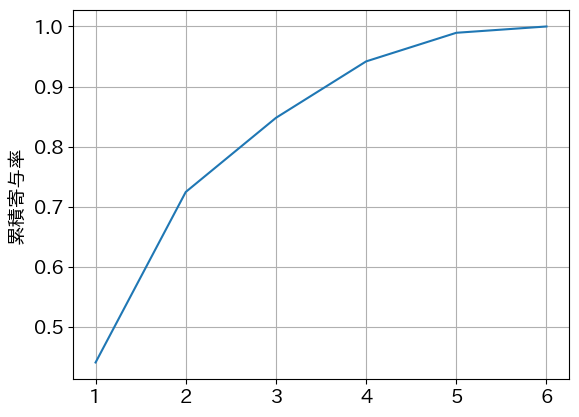

In [ ]:
url = 'https://tinyurl.com/2539almp'
df = pd.read_csv(url)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df_cluster = pd.DataFrame(df_s, columns = df.columns)
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3, random_state = random_seed)
kmeans_model.fit(df_cluster)
df_cluster['cluster'] = kmeans_model.labels_
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 6)
component = pca_model.fit_transform(df_cluster.drop('cluster', axis = 1))
rate = pca_model.explained_variance_ratio_
array = []
for i in range(len(rate)):
    accum = sum(rate[:i+1]) # 第(i+1)固有ベクトルまでの累積寄与率
    array.append(accum) 
plt.plot(range(1, 7), array)
plt.ylabel('累積寄与率')
plt.grid()
plt.show()

### 第1固有ベクトルと第2固有ベクトルの散布図
* 以下のコードで，第1固有ベクトルと第2固有ベクトルの散布図を作成する
* 散布図は，上のコードと同様に，マーカーをクラスタごとに色分けする
* 比較のため，上のコードで作成した，2つの散布図も作成する
* 実行結果から，（それなりに？）クラスタを分割できる散布図ができたと言えそう
  
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3～7行目: データの標準化を行い，標準化したデータを変数`df_cluster`に代入
* 8～11行目: データのクラスタリングを行い，その結果を`df_cluster`に代入
* 12～16行目: 主成分分析（新しい軸の数は 2）を行い，クラスタリングと主成分分析を併せた結果を変数`df_all`に代入
* 17行目: `lmplot`関数を使って，クラスタごとに色分けした第1固有ベクトルと第2固有ベクトルの散布図を作成
* 18行目: `show`関数で，それまでに設定した図（第1固有ベクトルと第2固有ベクトルの散布図）を実行画面に表示
* 19～22行目: 同様にして，食料雑貨品と洗剤・紙製品の散布図と乳製品と食料雑貨品の散布図を作成・表示

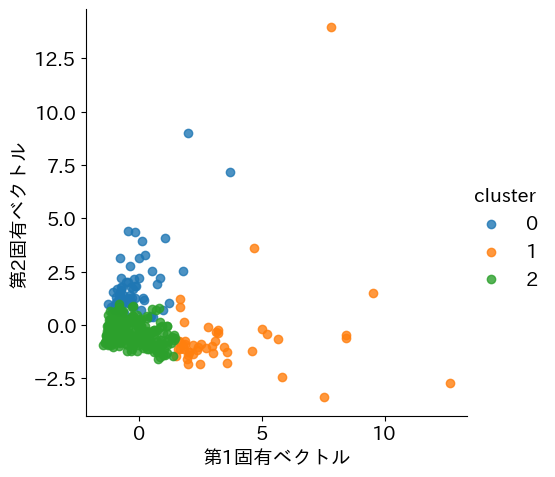

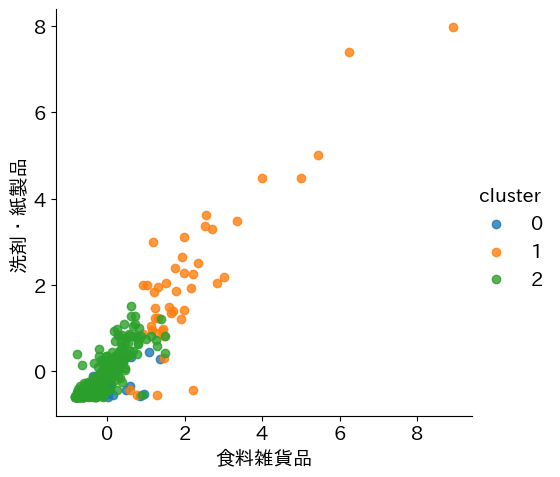

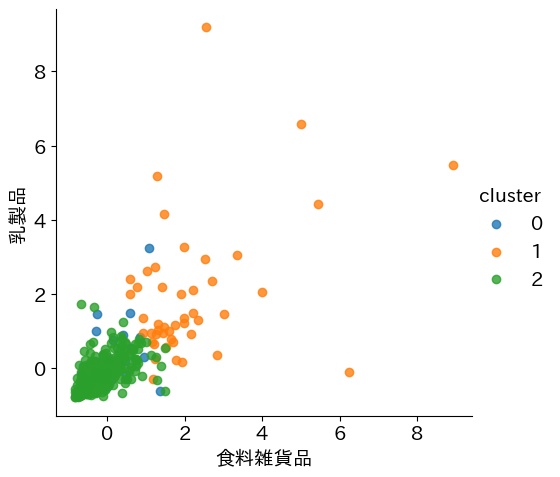

In [21]:
url = 'https://tinyurl.com/2539almp'
df = pd.read_csv(url)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df_cluster = pd.DataFrame(df_s, columns = df.columns)
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3, random_state = random_seed)
kmeans_model.fit(df_cluster)
df_cluster['cluster'] = kmeans_model.labels_
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)
component = pca_model.fit_transform(df_cluster.drop('cluster', axis = 1))
df_pca = pd.DataFrame(component, columns = ['第1固有ベクトル', '第2固有ベクトル'])
df_all = pd.concat([df_cluster, df_pca], axis = 1)
sns.lmplot(data = df_all, x = '第1固有ベクトル', y = '第2固有ベクトル', hue = 'cluster', fit_reg = False)
plt.show()
sns.lmplot(data = df_all, x = '食料雑貨品', y = '洗剤・紙製品', hue = 'cluster', fit_reg = False)
plt.show()
sns.lmplot(data = df_all, x = '食料雑貨品', y = '乳製品', hue = 'cluster', fit_reg = False)
plt.show()

# ボストン住宅データの前処理

## 用いるデータと分析の目的
* 第6回で使用したボストン住宅データを用いる
>* URL: https://bit.ly/4hwOUgx
>* 出典: 須藤秋良, 株式会社フレアリンク: スッキリわかるPythonによる機械学習入門, インプレス, 2020
* ボストン住宅データについては，第6回「[サンプルノートブック06](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook06.ipynb)」を参照
* 各列名と意味は以下のとおり
  
|**列名**| **意味** |
|:--|:--|
|CRIME| その地域の犯罪発生率（high / low / very_low） |
|ZN| 25,000平方フィートを超える住居区画の占める割合（広い部屋の割合） |
|INDUS| 非小売業が占める面積の割合 |
|CHAS| チャールズ川の付近かどうかのダミー変数（1: 川周辺，0: それ以外） |
|NOX| 窒素酸化物の濃度 |
|RM| 1戸当たりの平均部屋数 |
|AGE| 1940年より前に建てられた物件の割合（築年数が35～40年ほどの割合） |
|DIS| ボストン市内の5つの雇用施設までの距離 |
|RAD| 主要高速道路へのアクセスしやすさの指標 |
|TAX| 10,000ドル当たりの固定資産税率 |
|PTRATIO| その地域の教員1人当たりの生徒数 |
|LSTAT| その地域の低所得者の割合 |
|PRICE| その地域の住宅平均価格（1,000ドル単位） |
  
* ここでは，ボストン住宅データに対して次元削減を行うことを考える
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
*  3行目: `display`関数を使ってデータ（`df`の内容）を表示

In [56]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
display(df)

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,high,0.000,18.100,0,0.718,3.561,87.900,1.613,24.000,666,20.200,7.120,27.500
1,low,0.000,8.140,0,0.538,5.950,82.000,3.990,4.000,307,21.000,27.710,13.200
2,very_low,82.500,2.030,0,0.415,6.162,38.400,6.270,2.000,348,14.700,7.430,24.100
3,low,0.000,21.890,0,0.624,6.151,97.900,1.669,4.000,437,21.200,18.460,17.800
4,high,0.000,18.100,0,0.614,6.980,67.600,2.533,24.000,666,20.200,11.660,29.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,high,0.000,18.100,0,0.740,6.219,100.000,2.005,24.000,666,20.200,16.590,18.400
96,high,0.000,18.100,0,0.655,5.759,48.200,3.067,24.000,666,20.200,14.130,19.900
97,high,0.000,18.100,0,0.671,6.380,96.200,1.386,24.000,666,20.200,23.690,13.100
98,low,0.000,9.900,0,0.544,5.914,83.200,3.999,4.000,304,18.400,18.330,17.800


## ダミー変数化／欠損値への対処／データの標準化
* 第6回「[サンプルノートブック06](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook06.ipynb)」のときと同様に，前処理を行う
* 以下のコードで，欠損値への対処，ダミー変数化，データの標準化を行う
>* CRIME列のデータの値が文字列なので，ダミー変数化する
>* 欠損値は各特徴量の算術平均で置き換える
>* 最後にデータの標準化を行う
* 以上の前処理を施したデータは 14次元データとなる
  
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `get_dummies`関数を使って，CRIME列（`df['CRIME']`）をダミー変数化し，その結果を変数`dummy`に代入
>* `drop_first = True`を指定することで，ダミー変数化したDataFrameの第1列目が削除される（デフォルトは`False`）
* 4行目: `concat`関数を使って，2つのDataFrame `df`と`dummy`を結合し，その結果を変数`df`に代入
* 5行目: `drop`メソッドで，CRIME列を削除し，その結果を変数`df`に代入
* 6行目: `fillna`メソッドと`mean`メソッドを使って，欠損値を算術平均で穴埋めし，その結果を`df`に代入
* 7行目: `preprocessing`モジュールの`StandardScaler`クラスの読み込み
* 8行目: `StandardScaler`クラスのオブジェクトを生成し，変数`sc`に代入
* 9行目: `sc`に対し，`fit`メソッドを適用する（引数は`df`）
* 10行目: `sc`に対する`transform`メソッドで`df`を標準化し，その結果を変数`df_s`に代入
* 11行目: `DataFrame`関数で，`df_s`をDataFrameに変換し，その結果を変数`df`に代入
>* `columns = df.columns`で，変換したDataFrameの列名を`df`の列名「ZN」～「very_low」に指定
* 12行目: `display`関数を使ってデータ（`df`の内容）を表示

In [64]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
dummy = pd.get_dummies(df['CRIME'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df = pd.DataFrame(df_s, columns = df.columns)
display(df)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE,low,very_low
0,-0.468,1.250,-0.229,1.577,-3.499,0.801,-1.129,1.847,1.777,0.871,-0.692,0.425,-0.577,-1.000
1,-0.468,-0.338,-0.229,-0.048,-0.374,0.589,0.020,-0.575,-0.462,1.285,2.337,-1.077,1.732,-1.000
2,3.432,-1.312,-0.229,-1.159,-0.097,-0.975,1.122,-0.817,-0.207,-1.975,-0.647,0.068,-0.577,1.000
3,-0.468,1.854,-0.229,0.728,-0.111,1.160,-1.102,-0.575,0.349,1.388,0.976,-0.594,1.732,-1.000
4,-0.468,1.250,-0.229,0.638,0.973,0.073,-0.684,1.847,1.777,0.871,-0.024,0.666,-0.577,-1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.468,1.250,-0.229,1.776,-0.022,1.235,-0.940,1.847,1.777,0.871,0.701,-0.531,-0.577,-1.000
96,-0.468,1.250,-0.229,1.008,-0.624,-0.623,-0.426,1.847,1.777,0.871,0.339,-0.374,-0.577,-1.000
97,-0.468,1.250,-0.229,1.153,0.188,1.099,-1.239,1.847,1.777,0.871,1.746,-1.088,-0.577,-1.000
98,-0.468,-0.057,-0.229,0.006,-0.421,0.632,0.024,-0.575,-0.481,-0.061,0.957,-0.594,1.732,-1.000


# ボストン住宅データの次元削減

## モデルの学習
* 次に，前処理を施した14次元データに対して主成分分析を行い，2次元データに次元削減する
* ただし，**白色化**と呼ばれる操作を加える
* 白色化により，各特徴量が無相関になり，分散が1に均一化される
* データの構造を把握することが目的の場合は白色化は行わないのが一般的
* 白色化の設定は，PCAクラスのオブジェクト生成時に行う
* 書式: `PCA(n_components = [新しい軸の数], whiten = True)`
* デフォルトは`whiten = False`（白色化なし）
  
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3～11行目: ダミー変数化，欠損値への対処，データの標準化を行い，標準化したデータを変数`df`に代入
* 12行目:  `sklearn` (scikit-learn) の`decomposition`モジュール内にある`PCA`クラスを読み込む 
* 13行目: `PCA(n_components = 2, whiten = True)`で，モデルの学習を行うためのオブジェクトを`PCA`クラスから生成し，変数`pca_model`に代入
>* `n_components = 2`で，生成する新しい軸（固有ベクトル）の数を 2 に設定
>* `whiten = True`で，白色化を行う
* 14行目: `fit_transform`メソッドでモデルの学習（主成分分析）を実行
>* 戻り値である各固有ベクトルにおける各データの値を変数`component`に代入
* 15行目: `DataFrame`関数を使って，`component` をDataFrameに変換し，その結果を変数`df_pca`に代入
>* 列名はそれぞれ「第1固有ベクトル」「第2固有ベクトル」とする
* 16行目: `concat`関数を使って，`df`と`df_pca`を結合し，その結果を変数`df`に代入
* 17行目: `display`関数を使ってデータ（`df`の内容）を表示

In [16]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
dummy = pd.get_dummies(df['CRIME'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df = pd.DataFrame(df_s, columns = df.columns)
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2, whiten = True)
component = pca_model.fit_transform(df)
df_pca = pd.DataFrame(component, columns = ['第1固有ベクトル', '第2固有ベクトル'])
df = pd.concat([df, df_pca], axis = 1)
display(df)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE,low,very_low,第1固有ベクトル,第2固有ベクトル
0,-0.468,1.250,-0.229,1.577,-3.499,0.801,-1.129,1.847,1.777,0.871,-0.692,0.425,-0.577,-1.000,1.517,-0.709
1,-0.468,-0.338,-0.229,-0.048,-0.374,0.589,0.020,-0.575,-0.462,1.285,2.337,-1.077,1.732,-1.000,0.548,-0.185
2,3.432,-1.312,-0.229,-1.159,-0.097,-0.975,1.122,-0.817,-0.207,-1.975,-0.647,0.068,-0.577,1.000,-1.427,-0.587
3,-0.468,1.854,-0.229,0.728,-0.111,1.160,-1.102,-0.575,0.349,1.388,0.976,-0.594,1.732,-1.000,1.098,0.513
4,-0.468,1.250,-0.229,0.638,0.973,0.073,-0.684,1.847,1.777,0.871,-0.024,0.666,-0.577,-1.000,0.926,0.263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.468,1.250,-0.229,1.776,-0.022,1.235,-0.940,1.847,1.777,0.871,0.701,-0.531,-0.577,-1.000,1.529,-0.161
96,-0.468,1.250,-0.229,1.008,-0.624,-0.623,-0.426,1.847,1.777,0.871,0.339,-0.374,-0.577,-1.000,1.118,-0.651
97,-0.468,1.250,-0.229,1.153,0.188,1.099,-1.239,1.847,1.777,0.871,1.746,-1.088,-0.577,-1.000,1.606,-0.417
98,-0.468,-0.057,-0.229,0.006,-0.421,0.632,0.024,-0.575,-0.481,-0.061,0.957,-0.594,1.732,-1.000,0.318,0.448


## 結果の分析

### 主成分負荷量の確認
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3～11行目: ダミー変数化，欠損値への対処，データの標準化を行い，標準化したデータを変数`df`に代入
* 12～16行目: 主成分分析（新しい軸の数は 2）を行い，結果を変数`df`に代入
* 17行目: `corr`メソッドを使って主成分負荷量（元データの特徴量と新データの特徴量との相関係数）を計算し，その結果を変数`r`に代入
* 18行目: `r`から主成分負荷量の部分を抽出し，`display`関数で表示
>* `r['ZN':'very_low'][['第1固有ベクトル', '第2固有ベクトル']]`で，DataFrame `r`からZN～very_low，第1固有ベクトルと第2固有ベクトルの列を抽出

In [27]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
dummy = pd.get_dummies(df['CRIME'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df = pd.DataFrame(df_s, columns = df.columns)
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2, whiten = True)
component = pca_model.fit_transform(df)
df_pca = pd.DataFrame(component, columns = ['第1固有ベクトル', '第2固有ベクトル'])
df = pd.concat([df, df_pca], axis = 1)
r = df.corr()
display(r['ZN':'very_low'][['第1固有ベクトル', '第2固有ベクトル']])

,第1固有ベクトル,第2固有ベクトル
ZN,-0.569,-0.216
INDUS,0.896,0.034
CHAS,0.111,0.289
NOX,0.869,0.199
RM,-0.491,0.609
AGE,0.747,0.287
DIS,-0.751,-0.425
RAD,0.757,-0.152
TAX,0.811,-0.172
PTRATIO,0.404,-0.507


### 散布図の作成
* 主成分分析によって新たに作成された2つの軸（第1固有ベクトルと第2固有ベクトル）に関するデータに対しての散布図を作成する
* 多次元データを2次元データに次元削減することで，データ全体の傾向を散布図で可視化することができる
* ただし，新しい発見が必ず見つかるとは言えない
  
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3～11行目: ダミー変数化，欠損値への対処，データの標準化を行い，標準化したデータを変数`df`に代入
* 12～16行目: 主成分分析（新しい軸の数は 2）を行い，結果を変数`df`に代入
* 17～20行目: `scatter`関数を使って，第1固有ベクトルと第2固有ベクトルの散布図を作成

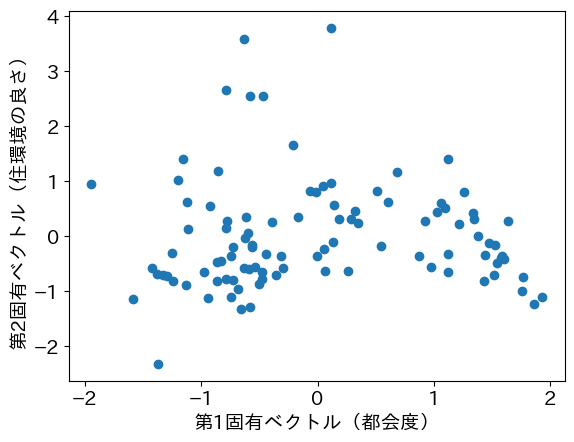

In [25]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
dummy = pd.get_dummies(df['CRIME'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df = pd.DataFrame(df_s, columns = df.columns)
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2, whiten = True)
component = pca_model.fit_transform(df)
df_pca = pd.DataFrame(component, columns = ['第1固有ベクトル', '第2固有ベクトル'])
df = pd.concat([df, df_pca], axis = 1)
plt.scatter(df['第1固有ベクトル'], df['第2固有ベクトル'])
plt.xlabel('第1固有ベクトル（都会度）')
plt.ylabel('第2固有ベクトル（住環境の良さ）')
plt.show()

### 寄与率の確認
* 以下のコードの結果から，第4固有ベクトルまでの累積寄与率で70%を超えていることが確認できる
  
**［以下のコードの処理内容］**
* 1～2行目: csvファイルをDataFrameとして読み込んで，変数`df`に代入
* 3～11行目: ダミー変数化，欠損値への対処，データの標準化を行い，標準化したデータを変数`df`に代入
* 12～14行目: 主成分分析を行い，新しい軸のデータを変数`component`に代入
* 15行目: `explained_variance_ratio_`属性から寄与率を取り出し，変数`rate`に代入
* 16行目: `DataFrame`関数で`rate`をDataFrameに変換し，その結果を`display`関数で表示

In [ ]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
dummy = pd.get_dummies(df['CRIME'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df = pd.DataFrame(df_s, columns = df.columns)
from sklearn.decomposition import PCA
pca_model = PCA(whiten = True)
component = pca_model.fit_transform(df)
rate = pca_model.explained_variance_ratio_
display(pd.DataFrame(rate, columns = ['寄与率']))

,寄与率
0,0.428
1,0.155
2,0.109
3,0.068
4,0.063
5,0.058
6,0.031
7,0.025
8,0.020
9,0.017


### 累積寄与率の可視化
* コードは理解しなくてよいので，結果だけ確認する

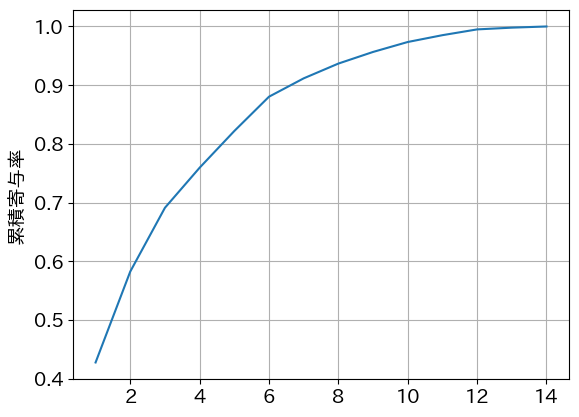

In [ ]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
dummy = pd.get_dummies(df['CRIME'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_s = sc.transform(df)
df = pd.DataFrame(df_s, columns = df.columns)
from sklearn.decomposition import PCA
pca_model = PCA(whiten = True)
component = pca_model.fit_transform(df)
rate = pca_model.explained_variance_ratio_
array = []
for i in range(len(rate)):
    accum = sum(rate[:i+1]) # 第(i+1)固有ベクトルまでの累積寄与率
    array.append(accum) 
plt.plot(range(1, 15), array)
plt.ylabel('累積寄与率')
plt.grid()
plt.show()